In [1]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = pd.read_csv("cardiovascular_diseases_dv3.csv", sep=';')

In [3]:
dataset.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [4]:
dataset.describe()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000,68783.000000
mean,53.326781,1.348749,164.361252,74.121934,126.614585,81.381591,1.364727,1.225986,0.088001,0.053632,0.803367,0.494904
std,6.768163,0.476578,8.184850,14.331392,16.763763,9.676679,0.678976,0.571961,0.283299,0.225293,0.397455,0.499978
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
 11  CARDIO_DISEASE     68783 non-null  int64
dtypes: int64(12)
memory usage: 6.3 MB


In [6]:
#checking for null values
dataset.isnull().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [7]:
dataset.shape

(68783, 12)

In [8]:
# finding the number of duplicated rows
print(format(dataset.duplicated().sum()))

3820


In [9]:
# removing all the duplicated row(comsidering only the first instance)
dataset.drop_duplicates(inplace=True)

In [10]:
# checking for duplicates
print(format(dataset.duplicated().sum()))

0


In [11]:
# shape after droping all duplicate row
dataset.shape

(64963, 12)

In [12]:
dataset.describe()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000
mean,53.353155,1.356511,164.347259,74.497252,126.979989,81.480766,1.384080,1.237905,0.092714,0.056663,0.797115,0.508797
std,6.811546,0.478972,8.330184,14.552793,17.116092,9.904148,0.691197,0.584059,0.290034,0.231199,0.402150,0.499926
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,82.500000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
dataset.nunique()

AGE                   28
GENDER                 2
HEIGHT               106
WEIGHT               152
AP_HIGH              108
AP_LOW                84
CHOLESTEROL            3
GLUCOSE                3
SMOKE                  2
ALCOHOL                2
PHYSICAL_ACTIVITY      2
CARDIO_DISEASE         2
dtype: int64

C:\Users\sujan\Anaconda3\envs\heart\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sujan\Anaconda3\envs\heart\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sujan\Anaconda3\envs\heart\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:xlabel='WEIGHT', ylabel='Density'>

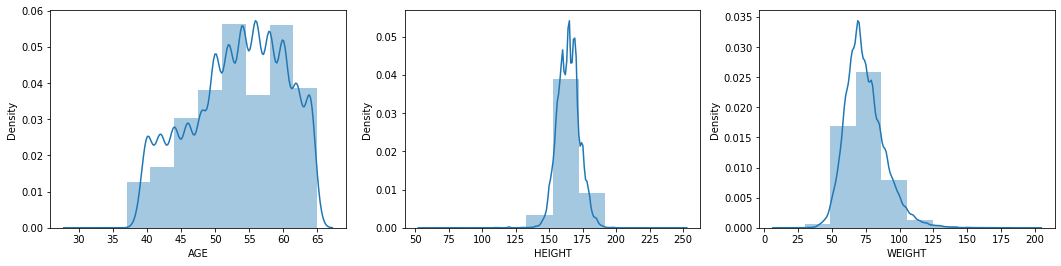

In [14]:
# Distributions of age, height and weight variables
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.distplot(dataset.AGE, bins=10, kde=True, ax=axes[0])
sns.distplot(dataset.HEIGHT, bins=10, kde=True, ax=axes[1])
sns.distplot(dataset.WEIGHT, bins=10, kde=True, ax=axes[2])

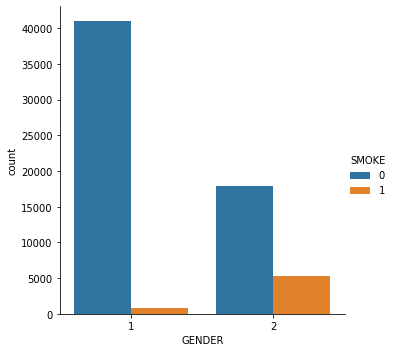

In [15]:
# Lets explore some correlations that might arise between the features
sns.catplot(x = 'GENDER',data=dataset,hue='SMOKE',kind='count') # it looks like more women don't smoke 

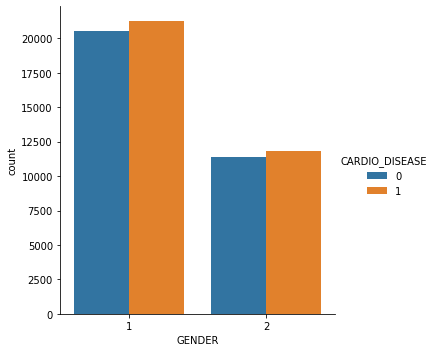

In [16]:
sns.catplot(x = 'GENDER',data=dataset,hue='CARDIO_DISEASE',kind='count')

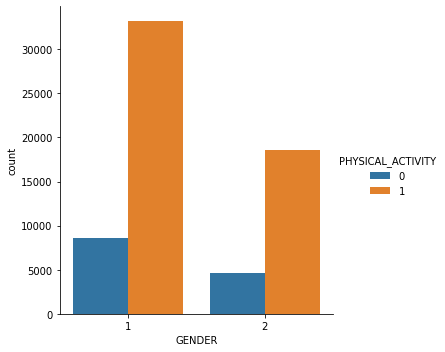

In [17]:
sns.catplot(x = 'GENDER',data=dataset,hue='PHYSICAL_ACTIVITY',kind='count')

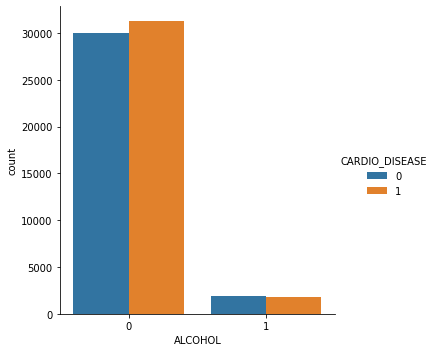

In [18]:
sns.catplot(x = 'ALCOHOL',data=dataset,hue='CARDIO_DISEASE',kind='count')

In [19]:
dataset.corr()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
AGE,1.000000,-0.024040,-0.083571,0.052809,0.210098,0.152171,0.157027,0.099334,-0.050274,-0.030868,-0.009943,0.235642
GENDER,-0.024040,1.000000,0.504744,0.149625,0.056289,0.064171,-0.045535,-0.027451,0.341268,0.171077,0.009255,0.000531
HEIGHT,-0.083571,0.504744,1.000000,0.292616,0.019577,0.035623,-0.050071,-0.018230,0.190853,0.096391,-0.007293,-0.009193
WEIGHT,0.052809,0.149625,0.292616,1.000000,0.263383,0.247304,0.131378,0.099914,0.060338,0.063076,-0.011642,0.172617
AP_HIGH,0.210098,0.056289,0.019577,0.263383,1.000000,0.696600,0.185811,0.085832,0.021156,0.027695,0.004786,0.423504
AP_LOW,0.152171,0.064171,0.035623,0.247304,0.696600,1.000000,0.155279,0.073338,0.021984,0.041447,0.003310,0.335708
CHOLESTEROL,0.157027,-0.045535,-0.050071,0.131378,0.185811,0.155279,1.000000,0.443011,0.001896,0.029592,0.018673,0.213521
GLUCOSE,0.099334,-0.027451,-0.018230,0.099914,0.085832,0.073338,0.443011,1.000000,-0.011714,0.006529,0.000038,0.081323
SMOKE,-0.050274,0.341268,0.190853,0.060338,0.021156,0.021984,0.001896,-0.011714,1.000000,0.337396,0.030220,-0.024470
ALCOHOL,-0.030868,0.171077,0.096391,0.063076,0.027695,0.041447,0.029592,0.006529,0.337396,1.000000,0.029109,-0.015167


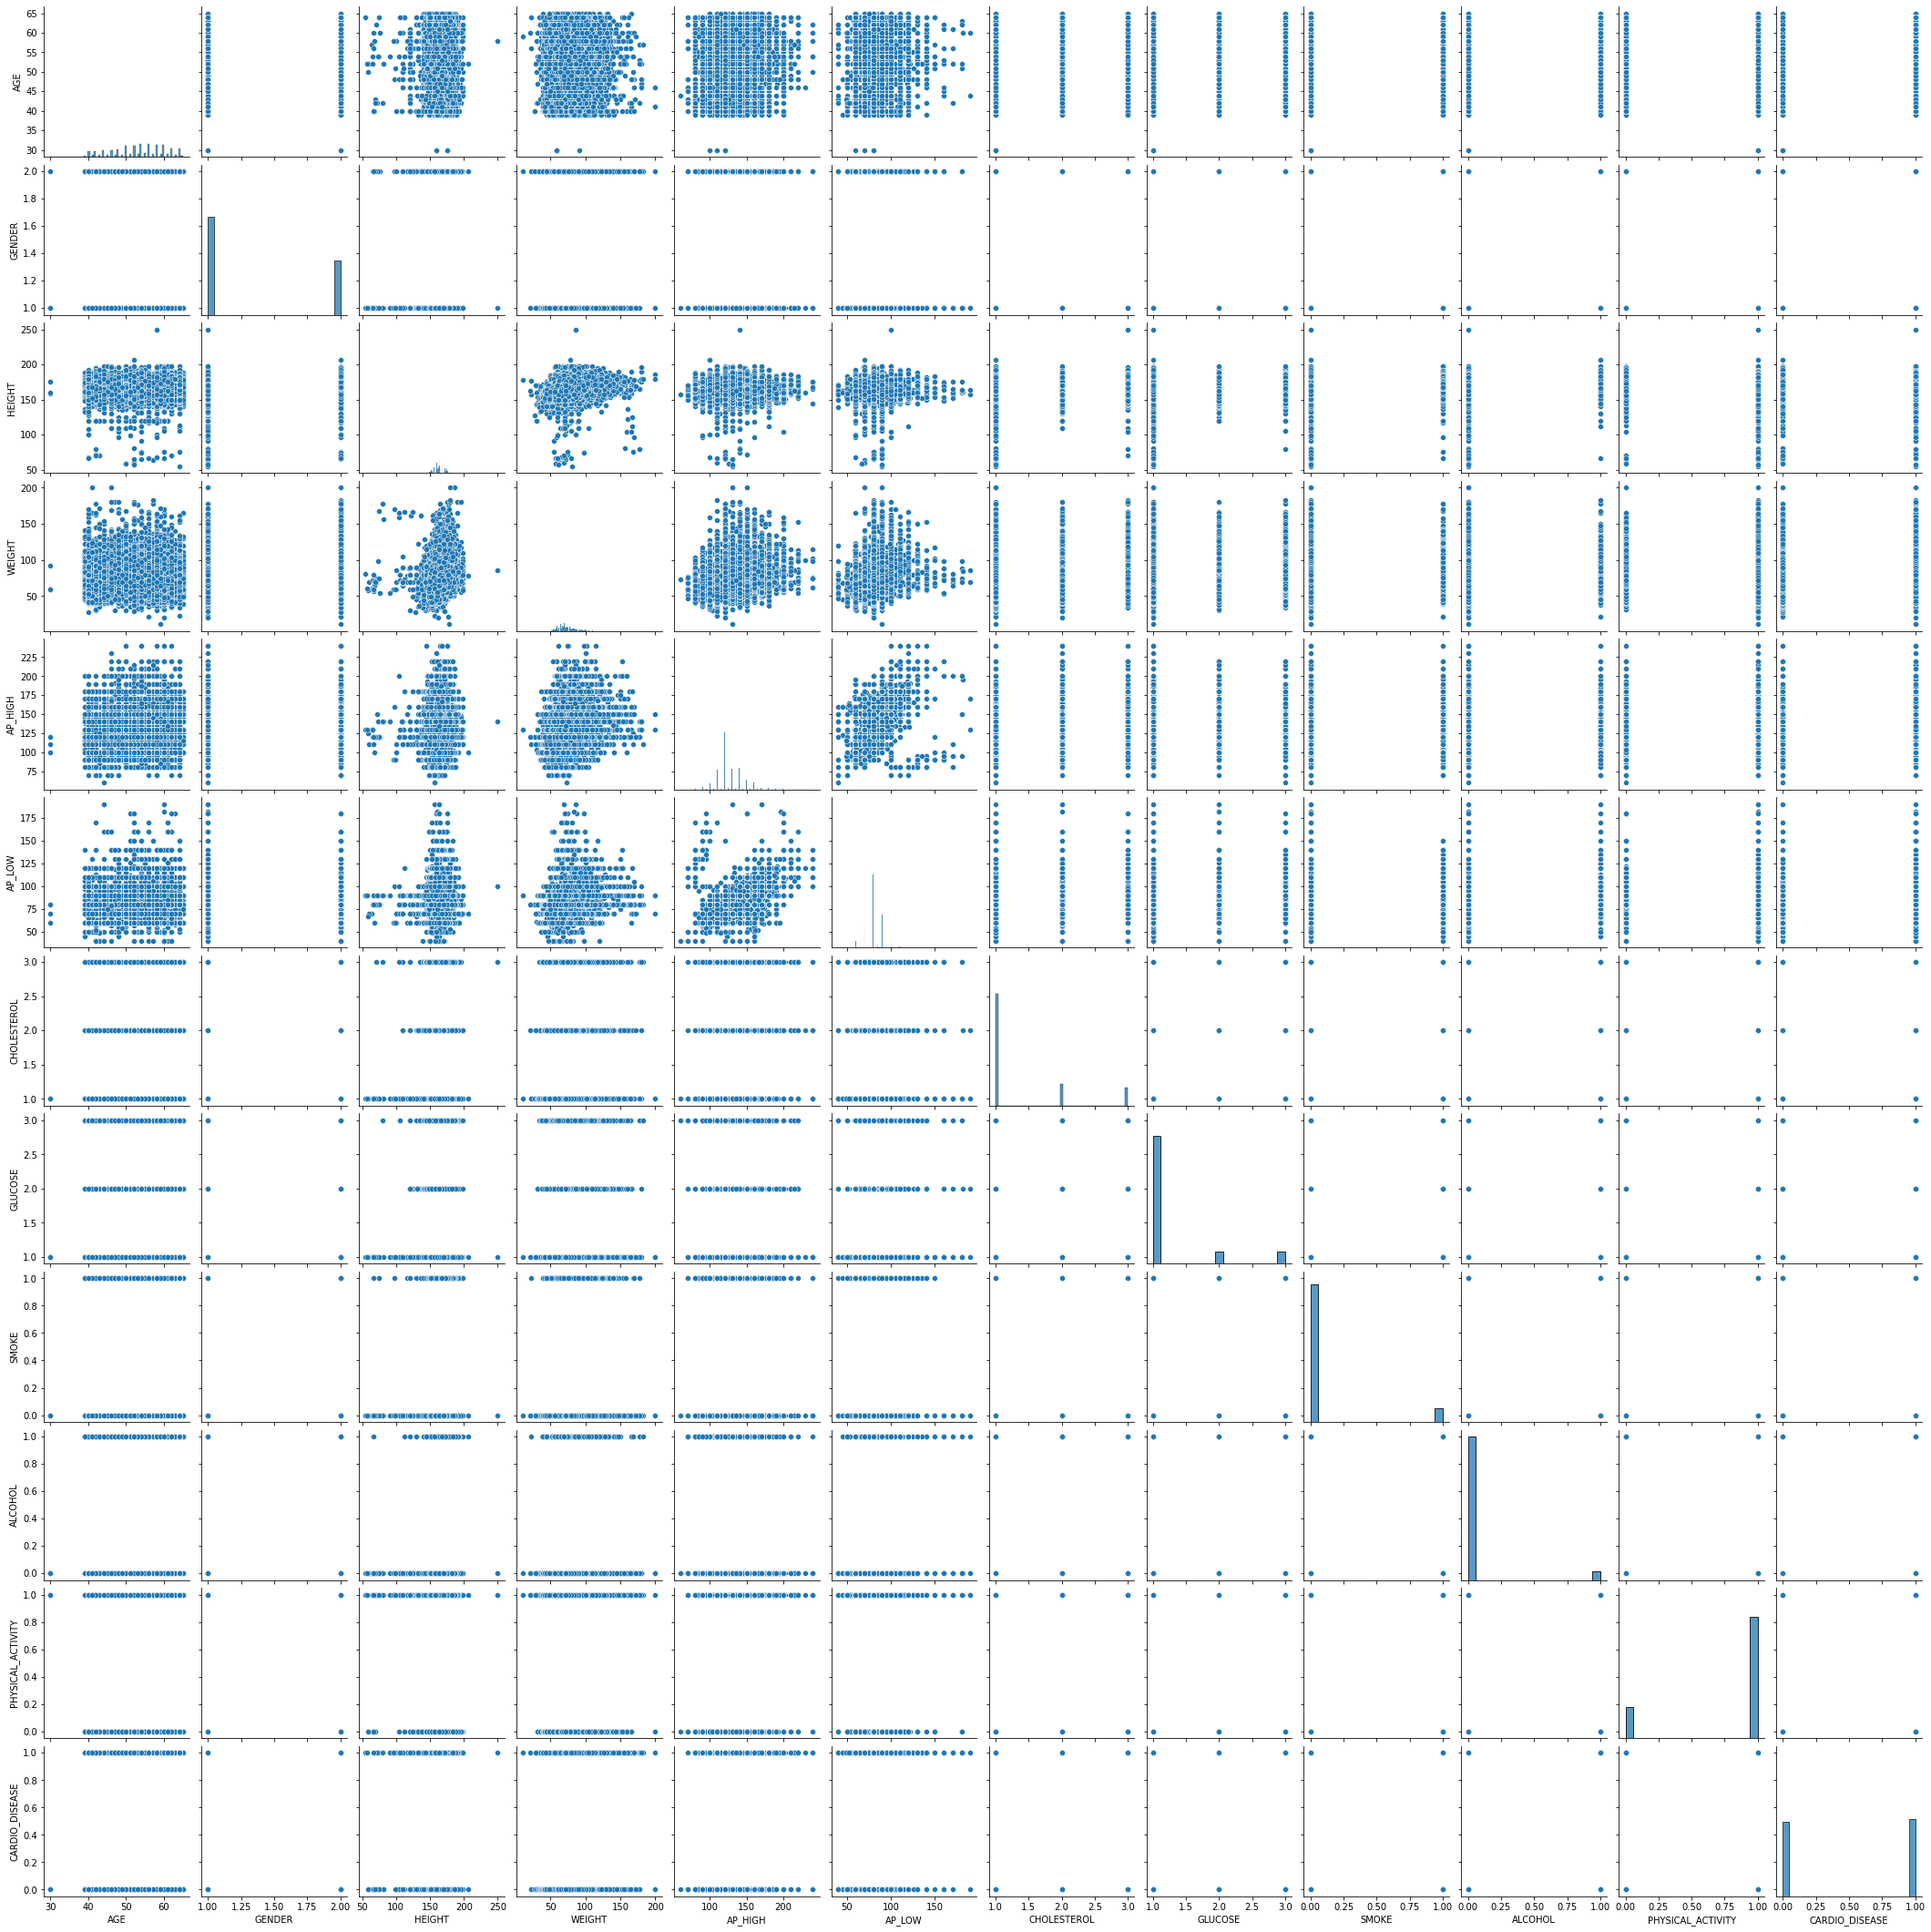

In [20]:
sns.pairplot(dataset)

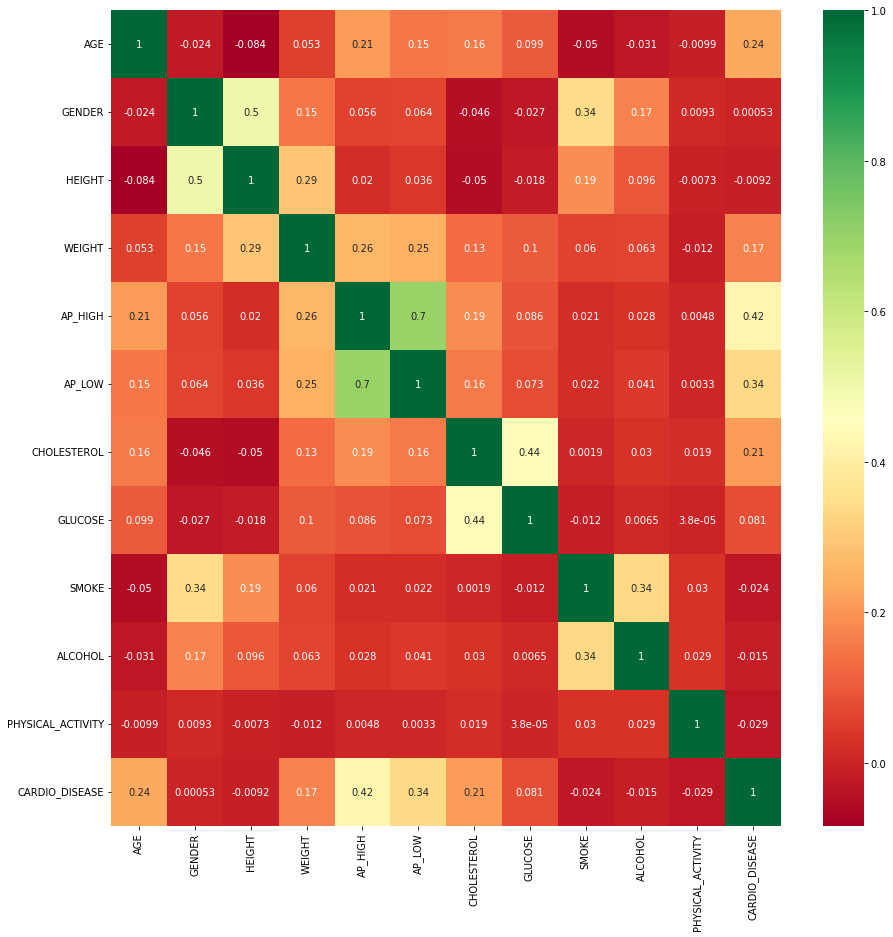

In [21]:
corrmat  = dataset.corr()
top_corr_features = corrmat.index 
plt.figure(figsize=(15, 15))
#plot heatmap
h = sns.heatmap(dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [22]:
Y = dataset['CARDIO_DISEASE']
X = dataset.drop(['CARDIO_DISEASE'], axis=1)

In [23]:
X.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
0,50,2,168,62,110,80,1,1,0,0,1
1,55,1,156,85,140,90,3,1,0,0,1
2,52,1,165,64,130,70,3,1,0,0,0
3,48,2,169,82,150,100,1,1,0,0,1
4,48,1,156,56,100,60,1,1,0,0,0


In [24]:
from sklearn.ensemble import ExtraTreesClassifier

m = ExtraTreesClassifier(random_state=0)
m.fit(X, Y)

print('feature importance of Y : ', m.feature_importances_)

feature importance of Y :  [0.14234799 0.00961028 0.23738583 0.2498863  0.19082903 0.09538027
 0.0427219  0.01447279 0.00529234 0.00512918 0.0069441 ]


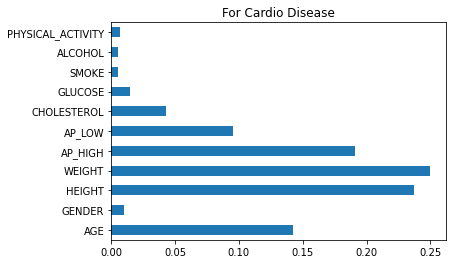

In [25]:
#plot graph of feature importance
feat_imp = pd.Series(m.feature_importances_, index=X.columns)
feat_imp.plot(kind='barh')
plt.title("For Cardio Disease")
plt.show()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [27]:
def Evaluation(base_model,X_train, y_train, X_test, y_test):
    base_model.fit(X_train, y_train)
    y_pred = base_model.predict(X_test)
    print("------------------------------------------------------") 
    print("Confussion Matrix")
    print("------------------------------------------------------")
    print(confusion_matrix(y_test,y_pred))
    print("------------------------------------------------------")
    print("Classification Report")
    print("------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("------------------------------------------------------")
    RF_accuracy = accuracy_score(y_test, y_pred)
    print("Overall accuracy score: " + str(RF_accuracy))
    print("------------------------------------------------------")
    score = cross_val_score(base_model, X_test, y_test, cv=5)
    print("Cross Validation Scores: ", score)
    print("------------------------------------------------------")
    print("Cross Validation Score Average", np.mean(score))

In [28]:
# Random Forest Classifier
RF_model = RandomForestClassifier(random_state=0)
Evaluation(RF_model,X_train, y_train, X_test, y_test)

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[4378 2061]
 [1965 4589]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.68      0.69      6439
           1       0.69      0.70      0.70      6554

    accuracy                           0.69     12993
   macro avg       0.69      0.69      0.69     12993
weighted avg       0.69      0.69      0.69     12993

------------------------------------------------------
Overall accuracy score: 0.6901408450704225
------------------------------------------------------
Cross Validation Scores:  [0.70334744 0.70257791 0.70604078 0.70977675 0.69361047]
------------------------------------------------------
Cross Validation Score Average 0.7030706723525155


In [31]:
# After playing with the hyperparameter a bit and applying grid search cv we get the following hyperparameters.
'''
    {'max_depth': 10,
     'max_features': 'sqrt',
     'min_samples_leaf': 2,
     'min_samples_split': 10,
     'n_estimators': 60}
     
'''
new_model = RandomForestClassifier(max_depth=10,
     max_features = 'sqrt',
     min_samples_leaf = 2,
     min_samples_split = 10,
     n_estimators = 60,
    random_state=0)

In [32]:
Evaluation(new_model,X_train, y_train, X_test, y_test)

------------------------------------------------------
Confussion Matrix
------------------------------------------------------
[[4993 1446]
 [2006 4548]]
------------------------------------------------------
Classification Report
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      6439
           1       0.76      0.69      0.72      6554

    accuracy                           0.73     12993
   macro avg       0.74      0.73      0.73     12993
weighted avg       0.74      0.73      0.73     12993

------------------------------------------------------
Overall accuracy score: 0.7343184791810975
------------------------------------------------------
Cross Validation Scores:  [0.73797614 0.72297037 0.73720662 0.73903002 0.71978445]
------------------------------------------------------
Cross Validation Score Average 0.731393521698551


In [33]:
import pickle

In [34]:
# open a file where you want to store the data
file = open('MODEL.pkl', 'wb')

# dump information to that file
pickle.dump(new_model, file)